# Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')

# Load dataset

In [2]:
df = pd.read_csv('METABRIC_RNA_Mutations.csv', low_memory=False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


## get info about dataset

In [3]:
df.iloc[:,:31].info() # only for first 31 Series, which contain the clinical attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

## Selection of the the Series to use and analysis of missing data

### Clinical attributes (and description) to use in the analyis:
 - age_at_diagnosis
 - cancer_type (Breast cancer types: 1- Breast Cancer or 2- Breast Sarcoma)
 - chemotherapy (Whether or not the patient had chemotherapy as a treatment (yes/no))
 - er_status (Cancer cells are positive or negative for estrogen receptors)
 - her2_status (Whether the cancer is positive or negative for HER2)
 - hormone_therapy (Whether or not the patient had hormonal as a treatment (yes/no))
 - inferred_menopausal_state (Whether the patient is is post menopausal or not (post/pre))
 - nottingham_prognostic_index (It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour.)
 - overall_survival_months (Duration from the time of the intervention to death)
 - pr_status (Cancer cells are positive or negative for progesterone receptors)
 - radio_therapy (Whether or not the patient had radio as a treatment (yes/no))
 - tumor_size (Tumor size measured by imaging techniques)
 - death_from_cancer (Wether the patient's death was due to cancer or not (yes/no))
 

In [4]:
columns_to_analyze = ['age_at_diagnosis', 'cancer_type', 'chemotherapy',
       'er_status', 'her2_status', 'hormone_therapy',
       'inferred_menopausal_state', 'nottingham_prognostic_index',
       'overall_survival_months', 'pr_status',
       'radio_therapy', 'tumor_size', 'death_from_cancer']

# Data Cleaning

In [5]:
# Counting of NaN
df.loc[:,columns_to_analyze].isna().sum()

age_at_diagnosis                0
cancer_type                     0
chemotherapy                    0
er_status                       0
her2_status                     0
hormone_therapy                 0
inferred_menopausal_state       0
nottingham_prognostic_index     0
overall_survival_months         0
pr_status                       0
radio_therapy                   0
tumor_size                     20
death_from_cancer               1
dtype: int64

In [6]:
# Descriptive Statistics of numerical Series
df.loc[:,columns_to_analyze].describe()

,age_at_diagnosis,chemotherapy,hormone_therapy,nottingham_prognostic_index,overall_survival_months,radio_therapy,tumor_size
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1884.000000
mean,61.087054,0.207983,0.616597,4.033019,125.121324,0.597164,26.238726
std,12.978711,0.405971,0.486343,1.144492,76.334148,0.490597,15.160976
min,21.930000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,51.375000,0.000000,0.000000,3.046000,60.825000,0.000000,17.000000
50%,61.770000,0.000000,1.000000,4.042000,115.616667,1.000000,23.000000
75%,70.592500,0.000000,1.000000,5.040250,184.716667,1.000000,30.000000
max,96.290000,1.000000,1.000000,6.360000,355.200000,1.000000,182.000000


In [7]:
# Printing the value counts
for col in columns_to_analyze:
    print(col, '\n', df[col].value_counts().head(10), '\n\n')

age_at_diagnosis 
 49.61    5
61.16    4
64.01    4
43.08    3
60.62    3
66.91    3
43.51    3
78.19    3
63.53    3
51.62    3
Name: age_at_diagnosis, dtype: int64 


cancer_type 
 Breast Cancer     1903
Breast Sarcoma       1
Name: cancer_type, dtype: int64 


chemotherapy 
 0    1508
1     396
Name: chemotherapy, dtype: int64 


er_status 
 Positive    1459
Negative     445
Name: er_status, dtype: int64 


her2_status 
 Negative    1668
Positive     236
Name: her2_status, dtype: int64 


hormone_therapy 
 1    1174
0     730
Name: hormone_therapy, dtype: int64 


inferred_menopausal_state 
 Post    1493
Pre      411
Name: inferred_menopausal_state, dtype: int64 


nottingham_prognostic_index 
 4.04    84
3.04    70
4.05    58
4.03    56
3.03    53
4.06    49
5.06    46
5.05    46
3.05    41
5.04    39
Name: nottingham_prognostic_index, dtype: int64 


overall_survival_months 
 192.200000    4
150.600000    3
128.366667    3
152.066667    3
19.733333     3
108.066667    3
16.700000 

In [8]:
# Printing unique values
for col in columns_to_analyze:
    print(col, '\n', df[col].unique(), '\n\n')

age_at_diagnosis 
 [75.65 43.19 48.87 ... 43.1  42.88 60.02] 


cancer_type 
 ['Breast Cancer' 'Breast Sarcoma'] 


chemotherapy 
 [0 1] 


er_status 
 ['Positive' 'Negative'] 


her2_status 
 ['Negative' 'Positive'] 


hormone_therapy 
 [1 0] 


inferred_menopausal_state 
 ['Post' 'Pre'] 


nottingham_prognostic_index 
 [6.044   4.02    4.03    4.05    6.08    4.062   4.058   5.032   3.056
 3.044   2.042   5.038   6.072   4.066   3.046   4.072   3.058   4.046
 4.034   3.036   4.032   3.024   3.048   3.026   5.028   4.11    5.06
 4.078   3.068   5.08    4.14    4.036   4.09    2.054   6.3     5.034
 3.06    4.12    5.052   3.04    4.1     2.018   3.07    4.026   3.028
 6.048   2.034   3.16    5.044   5.07    4.06    4.054   3.032   6.052
 5.076   4.038   6.1     4.024   4.028   5.054   6.104   5.048   3.052
 4.04    6.088   4.048   2.04    4.088   4.042   6.068   3.05    6.096
 2.026   6.038   5.042   6.056   6.036   4.076   5.05    2.02    4.056
 3.006   3.08    5.04    6.04    3.038 

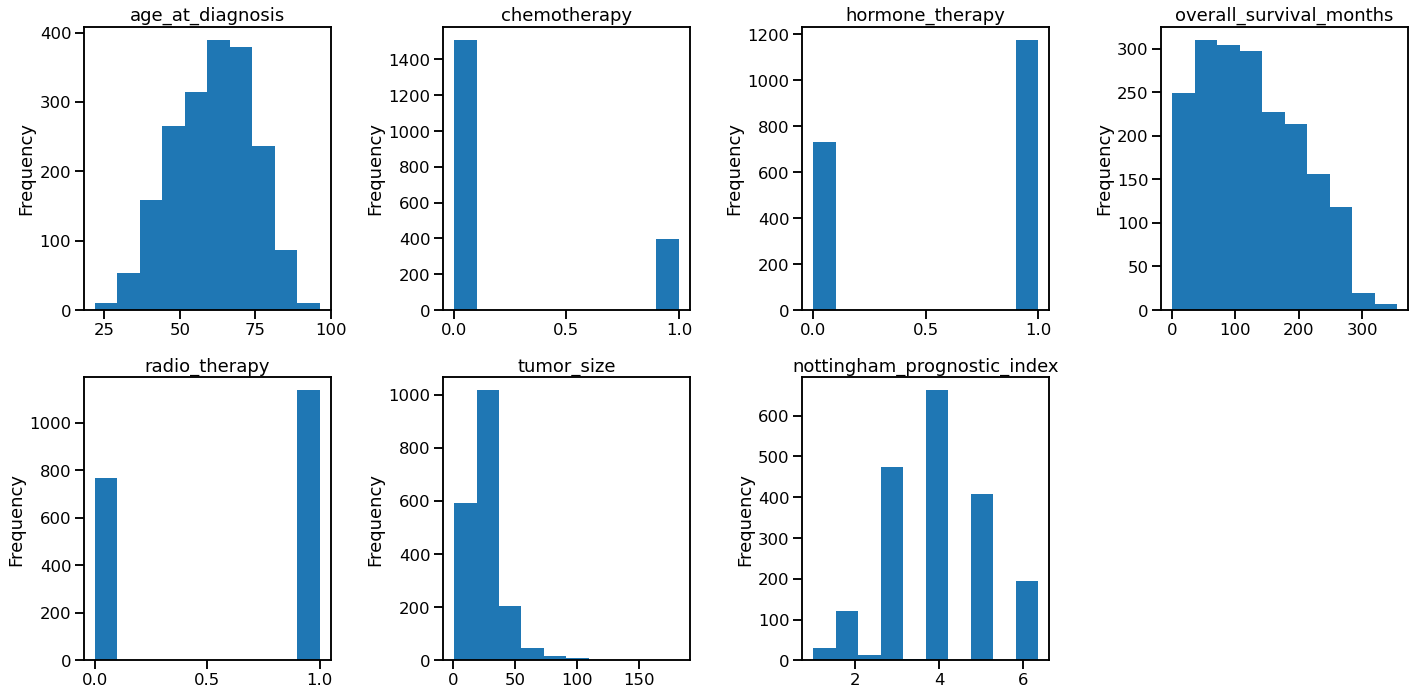

In [9]:
# Histogram to detect placeholders
numerical_columns = ['age_at_diagnosis', 'chemotherapy', 'hormone_therapy',
       'overall_survival_months', 'radio_therapy', 'tumor_size', 'nottingham_prognostic_index']

plt.figure(figsize=(20,10))

for i in range(0,7):
    ax = plt.subplot(2, 4, i+1)
    df[numerical_columns[i]].plot(kind='hist')
    ax.set_title(numerical_columns[i])
plt.tight_layout()

## Summary of data missing values and placeholders 

- age_at_diagnosis: values within expected range, no observed placeholders, no missing values
- chemotherapy: no missing values, 0 or 1 values
- hormone_therapy: no missing values, 0 or 1 values
- overall_survival_months: no missing values, **min value is 0 (cancer as cause of death without prior diagnosis?)**, max less than 30 years, so no placeholders
- radio_therapy: no missing values, 0 or 1 values
- **tumor_size contais 20 missing values**, no placeholders detected
- **death_from_cancer contains 1 missing value**, no placeholders detected

## Dealing with in missing values

Both tumor_size and death_from_cancer have missing values that needs to be dealt with. To determine how the NaN from death_from_cancer can be replaced, we will compare "death_from_cancer" with "overall_survival".

In [10]:
# First we will check the 'overall_survival' of the missing value
display(df[df['death_from_cancer'].isna()][['death_from_cancer', 'overall_survival']])

# "overall_survival" for missing value of 'death_from_cancer' is 0

# Check "overall_survival" for others
df[['death_from_cancer', 'overall_survival']].head(8)

# "overall_survival" of 0 may be "Died of Disease" or "Died of Other Causes"

,death_from_cancer,overall_survival
1166,NaN,0


,death_from_cancer,overall_survival
0,Living,1
1,Living,1
2,Died of Disease,0
3,Living,1
4,Died of Disease,0
5,Died of Disease,0
6,Living,1
7,Died of Other Causes,0


In [11]:
# We will check next the mean and median 'overall_survival_months' for 'Died of Disease' and 'Died of Other Causes'
display(df.groupby('death_from_cancer').agg(['mean', 'median'])['overall_survival_months'])

# and show the 'overall_survival_months' of 'death_from_cancer' missing value
df[df['death_from_cancer'].isna()][['death_from_cancer', 'overall_survival_months']]

,mean,median
death_from_cancer,,
Died of Disease,77.225456,56.716667
Died of Other Causes,129.460903,122.433333
Living,159.551228,158.033333


,death_from_cancer,overall_survival_months
1166,NaN,255.0


In [12]:
# Based on the observation, it is more likely that this missing value corresponds to 'Died of Other Causes'
df['death_from_cancer'].fillna('Died of Other Causes', inplace=True)

# Check replacement
display(df.loc[1166:1168, ['death_from_cancer', 'overall_survival_months']])

# Check value_counts to make sure no other substitution was made
display(df['death_from_cancer'].value_counts())
print('Total non-null observations for "death_from_cancer": ', df['death_from_cancer'].value_counts().sum())

,death_from_cancer,overall_survival_months
1166,Died of Other Causes,255.000000
1167,Living,196.533333
1168,Died of Disease,37.366667


Living                  801
Died of Disease         622
Died of Other Causes    481
Name: death_from_cancer, dtype: int64

Total non-null observations for "death_from_cancer":  1904


To deal with the missing values from 'tumor_size', we will compare 'tumor_size' with 'nottingham_prognostic_index', which uses the size of the tumor as criteria to calculate the index.

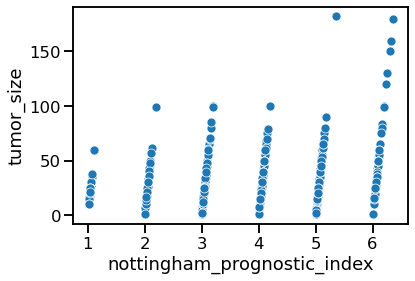

In [13]:
sns.scatterplot(data=df, x='nottingham_prognostic_index', y='tumor_size');

'tumor_size' increases with the increase of 'nottingham_prognostic_index'. A new Series called 'notthingham_int' will be created to convert 'nottingham_prognostic_index' into intergers. Then, the mean and median for 'tumor_size' of each group will be calculated and used the replace NaN in 'tumor_size'.

In [14]:
df['nottingham_int'] = df['nottingham_prognostic_index'].astype(int)
df[['nottingham_prognostic_index', 'nottingham_int']].head()

,nottingham_prognostic_index,nottingham_int
0,6.044,6
1,4.020,4
2,4.030,4
3,4.050,4
4,6.080,6


In [15]:
def fill_TumorSize(row):
    old_value = row['tumor_size']
    notthingham_index = row['nottingham_int']
    if pd.isna(row['tumor_size']):
        new_value = df[df['nottingham_int']==notthingham_index]['tumor_size'].mean()
    else:
        new_value = row['tumor_size']
    return new_value

In [16]:
df['tumor_size'] = df.apply(fill_TumorSize, axis=1)
print('Number of missing values in "tumor_size": ', df['tumor_size'].isna().sum())

Number of missing values in "tumor_size":  0


## Check for duplicates

In [17]:
df[df.duplicated()]

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,nottingham_int


# Exploratory Data Analysis

## Question 1: Does the age of diagnosis have an impact in the overall survival?

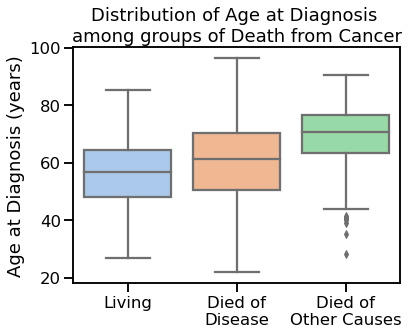

In [18]:
# Boxplot of ages in the different groups of "death_from_cancer"
plt.figure(figsize=(6,5))
ax = sns.boxplot(data=df, x='death_from_cancer', y='age_at_diagnosis', palette='pastel')
ax.set_xticklabels(['Living', 'Died of\nDisease', 'Died of\nOther Causes'])
ax.set_xlabel('')
ax.set_ylabel('Age at Diagnosis (years)')
ax.set_title('Distribution of Age at Diagnosis \namong groups of Death from Cancer')
plt.tight_layout()

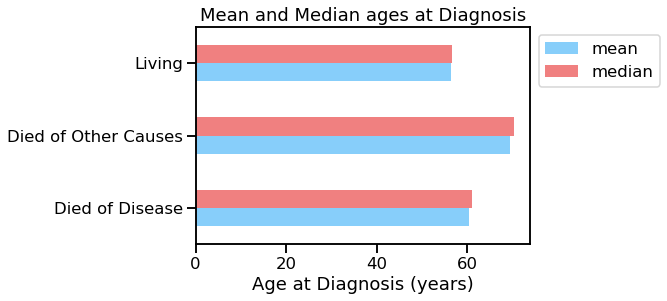

In [19]:
aad = df.groupby('death_from_cancer').agg(['mean', 
                                           'median'])['age_at_diagnosis'].reset_index().plot(kind='barh', 
                                                                                            x='death_from_cancer',
                                                                                                    color=['lightskyblue', 'lightcoral'])
plt.xlabel('Age at Diagnosis (years)')
plt.ylabel('')
plt.title('Mean and Median ages at Diagnosis')
aad.legend(bbox_to_anchor=(1, 1));

No major differences in the mean/median between groups "Died of Disease" and "Living" (approximately 5 years difference, with the latter having lower mean/median). However, individuals in the group "Died of Other Causes" were older when diagnosed. 

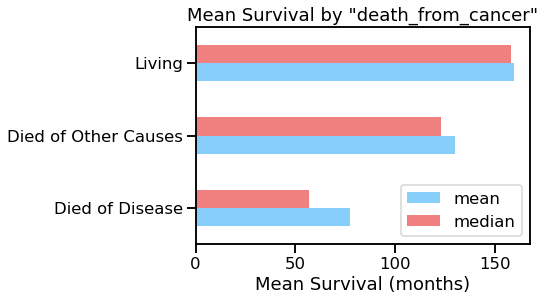

In [20]:
# Plot average Overall Survival by Death from Cancer
barp = df.groupby('death_from_cancer').agg(['mean', 'median'])['overall_survival_months'].reset_index().plot(kind='barh', 
                                                                                            x='death_from_cancer',
                                                                                                            color=['lightskyblue', 'lightcoral'])
plt.xlabel('Mean Survival (months)')
plt.ylabel('')
plt.title('Mean Survival by "death_from_cancer"');

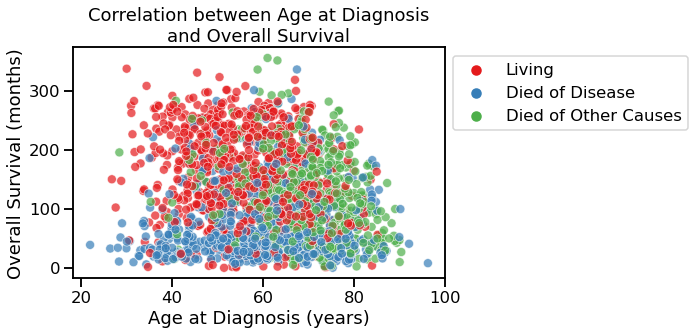

In [21]:
# Correlation between "age_at_diagnosis" and "overall_survival_months"
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=df, x='age_at_diagnosis', y='overall_survival_months', hue='death_from_cancer', 
                palette='Set1', alpha=0.7)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_xlabel('Age at Diagnosis (years)')
ax.set_ylabel('Overall Survival (months)')
ax.set_title('Correlation between Age at Diagnosis\nand Overall Survival')
plt.tight_layout();

The analysis with the scatterplot is inconclusive. An alternative approach will be to try regression.

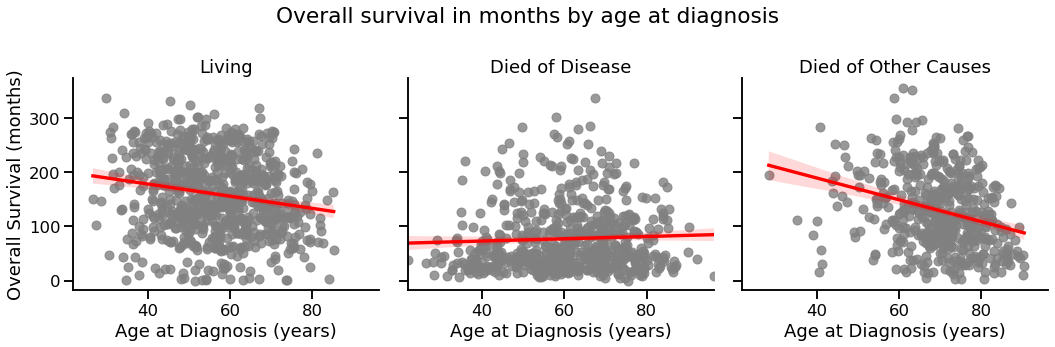

In [22]:
lm = sns.lmplot(data=df, x='age_at_diagnosis', y='overall_survival_months', 
           col='death_from_cancer',
               scatter_kws={"color": "grey"}, line_kws={"color": "red"})
fig = lm.fig
fig.suptitle('Overall survival in months by age at diagnosis')
titles = ['Living', 'Died of Disease', 'Died of Other Causes']
for i in range(0,3):
    ax = fig.axes[i]
    ax.set_title(titles[i])
    ax.set_xlabel('Age at Diagnosis (years)')
    if i < 1:
        ax.set_ylabel('Overall Survival (months)')
    else:
        ax.set_ylabel('')
fig.tight_layout()

The results show a negative correlation between age at diagnosis and overall surival for the "Living" and "Died of Other Causes" groups. This is expected given that older people have decreased life expectancy. No major correlation is seen for the "Died of Disease" group. Next, we will investigate if grouping by decade of diagnosis show a difference.

In [23]:
# make new Series with decade of life ("decade") at diagnosis
df['decade'] = df['age_at_diagnosis']//10
df['decade'] = df['decade'].map(lambda x: str(int(x*10))+'s')
df[['age_at_diagnosis', 'decade']].head()

,age_at_diagnosis,decade
0,75.65,70s
1,43.19,40s
2,48.87,40s
3,47.68,40s
4,76.97,70s


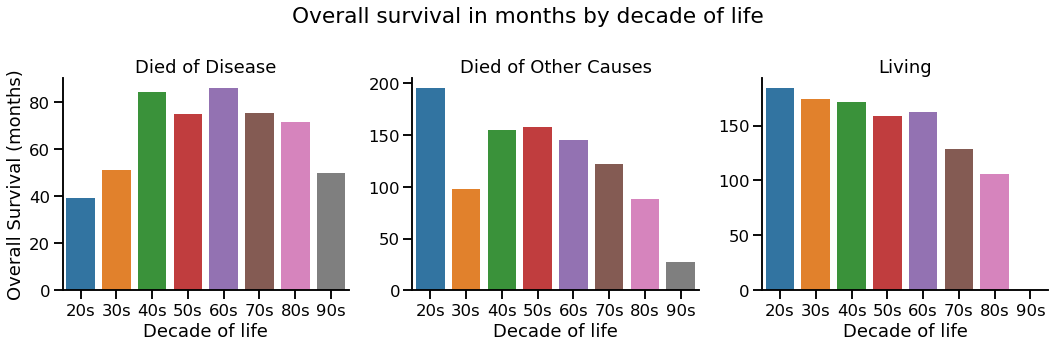

In [24]:
to_plot_byDecade = df.groupby(['death_from_cancer', 'decade']).mean()['overall_survival_months'].reset_index()
decade_catplot = sns.catplot(data=to_plot_byDecade, x='decade', y='overall_survival_months', 
            col='death_from_cancer', kind='bar', sharey=False)
fig = decade_catplot.fig
fig.suptitle('Overall survival in months by decade of life')
titles = ['Died of Disease', 'Died of Other Causes', 'Living']
for i in range(0,3):
    ax = fig.axes[i]
    ax.set_title(titles[i])
    ax.set_xlabel('Decade of life')
    if i < 1:
        ax.set_ylabel('Overall Survival (months)')
    else:
        ax.set_ylabel('')
fig.tight_layout();

Overall survival among those dying with the disease is lower if the diagnosis happenens before their 40s and decreases again in their 90s. Among those dying of other causes, overall survival decreases when the diagnosis occur at later ages, except in their 30s, which shows an abnormal decrease. It is worth mentioned that, as seen above, those dying of other causes are usually older. No conclusion can be drawn for those still living with the disease.

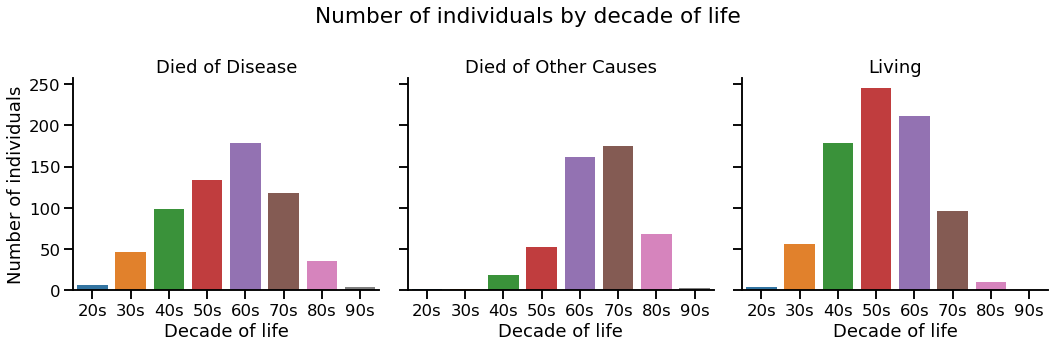

In [25]:
to_plot_Decade_counts = df.groupby(['decade', 'death_from_cancer']).count()['age_at_diagnosis'].reset_index()

decade_counts_catplot = sns.catplot(data=to_plot_Decade_counts, x='decade', y='age_at_diagnosis', 
            col='death_from_cancer', kind='bar')
fig = decade_counts_catplot.fig
fig.suptitle('Number of individuals by decade of life')
titles = ['Died of Disease', 'Died of Other Causes', 'Living']
for i in range(0,3):
    ax = fig.axes[i]
    ax.set_title(titles[i])
    ax.set_xlabel('Decade of life')
    if i < 1:
        ax.set_ylabel('Number of individuals')
    else:
        ax.set_ylabel('')
fig.tight_layout();

## Question 2: Do the levels of HER2 have an impact in the overall survival?

In [26]:
# Distribution of HER2-positive vs HER-negative among the three grougs of "death_from_cancer"
df.groupby(['death_from_cancer', 
            'her2_status']).count()['overall_survival_months'].reset_index().rename(columns={'overall_survival_months':
                                                                                            'counts'})

,death_from_cancer,her2_status,counts
0,Died of Disease,Negative,506
1,Died of Disease,Positive,116
2,Died of Other Causes,Negative,450
3,Died of Other Causes,Positive,31
4,Living,Negative,712
5,Living,Positive,89


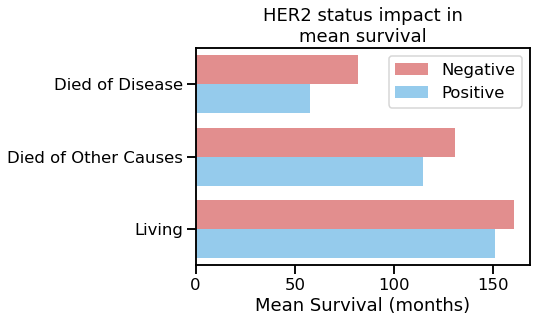

In [27]:
# Plot Mean Survival by Death from Cancer and HER2 status
to_plot_her2 = df.groupby(['death_from_cancer', 'her2_status']).mean()['overall_survival_months'].reset_index()

her2_plot = sns.barplot(data=to_plot_her2, y='death_from_cancer', x='overall_survival_months', hue='her2_status',
           orient='h', palette=['lightcoral', 'lightskyblue'])
her2_plot.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Mean Survival (months)')
plt.ylabel('')
plt.title('HER2 status impact in\nmean survival');

HER2 status seems to decrease the mean survival of patients that died of the disease. This is expected given that HER2 promotes the growth of cancer cells. It is worth mention that patient that died of other causes or that are still living also shown a decrease in mean survival from diagnosis, but the decrease is less significant than for those that died of the disease. It is worth mention the patients positive and negative are not similar, with the former being less represented.

## Question 3: Does the progesterone status (pr_status) have an impact in the overall survival?

In [28]:
# Distribution of progesterone-positive vs -negative among the three grougs of "death_from_cancer"
df.groupby(['death_from_cancer', 
            'pr_status']).count()['overall_survival_months'].reset_index().rename(columns={'overall_survival_months':
                                                                                            'counts'})

,death_from_cancer,pr_status,counts
0,Died of Disease,Negative,342
1,Died of Disease,Positive,280
2,Died of Other Causes,Negative,187
3,Died of Other Causes,Positive,294
4,Living,Negative,366
5,Living,Positive,435


Patients that died with the disease but are positive for progesterone receptor had a mean survival 55.0% higher than those negative.


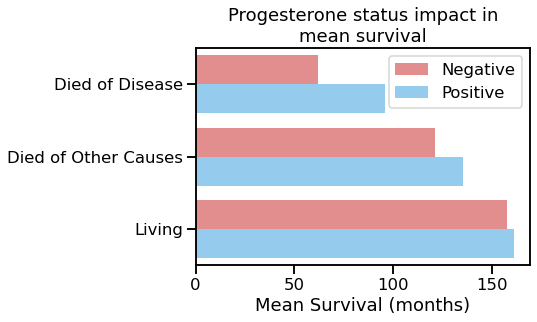

In [31]:
# Plot Mean Survival by Death from Cancer and progesterone status
to_plot_pr = df.groupby(['death_from_cancer', 'pr_status']).mean()['overall_survival_months'].reset_index().rename(columns={'overall_survival_months':
                                                                                            'mean_survival'})

pr_plot = sns.barplot(data=to_plot_pr, y='death_from_cancer', x='mean_survival', hue='pr_status',
           orient='h', palette=['lightcoral', 'lightskyblue'])
pr_plot.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Mean Survival (months)')
plt.ylabel('')
plt.title('Progesterone status impact in\nmean survival');

survival_pr_neg = to_plot_pr[(to_plot_pr['death_from_cancer']=='Died of Disease') & (to_plot_pr['pr_status']=='Negative')]['mean_survival']
survival_pr_pst = to_plot_pr[(to_plot_pr['death_from_cancer']=='Died of Disease') & (to_plot_pr['pr_status']=='Positive')]['mean_survival']
perc = round((float(survival_pr_pst)-float(survival_pr_neg))/(float(survival_pr_neg))*100, 1)
print('Patients that died with the disease but are positive for progesterone receptor had a mean survival {}% higher than those negative.'.format(perc))

It is clear from the analysis that the presence of progesterone receptores has a positive impact in survival since it increases the mean survival by 55% of the patients that died from the disease. This results may be related to the fact that these cancers can be treated by hormone therapy, which leads to better outlooks in the short-term.

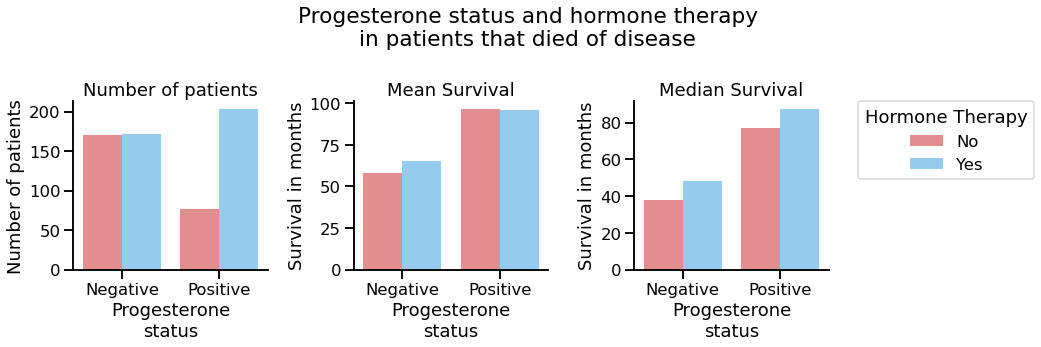

In [32]:
# Get counts, mean, and median for "overall_survival_months" by "death_from_cancer", "pr_status" and "hormone_therapy"
pr_hormone = df.groupby(['death_from_cancer', 'pr_status', 'hormone_therapy']).agg(['count', 
                                                  'mean', 'median'])['overall_survival_months'].reset_index()

# replace 0/1 by No/Yes in "hormone_therapy"
pr_hormone['hormone_therapy'] = pr_hormone['hormone_therapy'].map({0: 'No', 1: 'Yes'})

# select "Died of Disease" only
pr_hormone = pr_hormone[pr_hormone['death_from_cancer']=='Died of Disease']
pr_hormone_melt = pr_hormone.melt(id_vars=['death_from_cancer', 'pr_status', 'hormone_therapy'])
#display(pr_hormone_melt)

# Plot "count", "mean" and "median"
pr_hormone_catplot = sns.catplot(data=pr_hormone_melt, x='pr_status', y='value', hue='hormone_therapy',
             col='variable', kind='bar', sharey=False, legend=False, palette=['lightcoral', 'lightskyblue'])
fig = pr_hormone_catplot.fig
fig.suptitle('Progesterone status and hormone therapy\nin patients that died of disease')
titles = ['Number of patients', 'Mean Survival', 'Median Survival']
y_axes = ['Number of patients', 'Survival in months', 'Survival in months']
for i in range(0,3):
    ax = fig.axes[i]
    ax.set_title(titles[i])
    ax.set_xlabel('Progesterone\nstatus')
    ax.set_ylabel(y_axes[i])
plt.legend(bbox_to_anchor=(1.15,1), loc='upper left', borderaxespad=0, title='Hormone Therapy')
fig.tight_layout();

Most of the patients positive for progesterone receptors have recieved hormone therapy. Even though the median survival increased for these patients, it was not a very significant increase. 

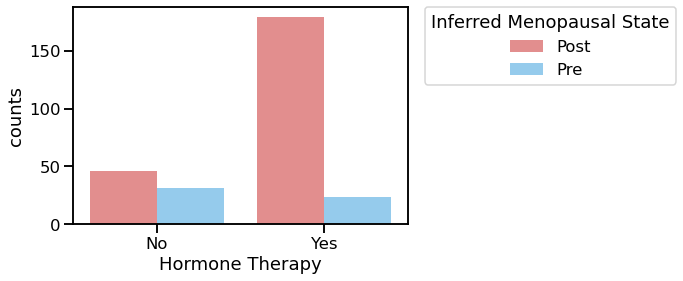

In [33]:
### Check if those with hormone treatment are pre or post menopause
to_plot_meno_st = df[(df['death_from_cancer']=='Died of Disease') &
   (df['pr_status']=='Positive')].groupby(['inferred_menopausal_state', 
                                           'hormone_therapy']).count().reset_index().iloc[:,:3]

to_plot_meno_st = to_plot_meno_st.rename(columns={'patient_id': 'counts'})
to_plot_meno_st['hormone_therapy'] = to_plot_meno_st['hormone_therapy'].map({0: 'No', 1: 'Yes'})

# plot
sns.barplot(data=to_plot_meno_st, x='hormone_therapy', y='counts', hue='inferred_menopausal_state', 
            palette=['lightcoral', 'lightskyblue'])
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0, title='Inferred Menopausal State')
plt.xlabel('Hormone Therapy')
fig.tight_layout();

Most of the patients that died of the disease and positive for progesterone receptor receiving Hormone Therapy are post menopause.

## Question 4: Does the size of the tumor determines treatment?

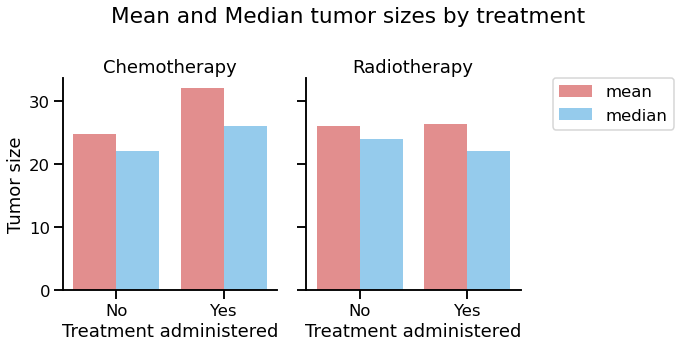

In [73]:
tumor_size_treatment = df[['chemotherapy', 'radio_therapy', 'tumor_size']].melt(id_vars=['tumor_size'], var_name='treatment')
tumor_size_treatment['value'] = tumor_size_treatment['value'].map({0: 'No', 1: 'Yes'})
to_plot_tumor = tumor_size_treatment.groupby(['treatment', 'value']).agg(['mean', 'median'])['tumor_size'].reset_index()
to_plot_tumor = to_plot_tumor.melt(id_vars=['treatment', 'value'], var_name='stats', value_name='stat_value')

# Plot "mean" and "median"
tumor_size_catplot = sns.catplot(data=to_plot_tumor, x='value', y='stat_value', hue='stats',
             col='treatment', kind='bar', sharey=True, legend=False, palette=['lightcoral', 'lightskyblue'])
fig = tumor_size_catplot.fig
fig.suptitle('Mean and Median tumor sizes by treatment')
titles = ['Chemotherapy', 'Radiotherapy']
y_axes = 'Tumor size'
for i in range(0,2):
    ax = fig.axes[i]
    ax.set_title(titles[i])
    ax.set_xlabel('Treatment administered')
    if i < 1:
        ax.set_ylabel(y_axes)
    else: 
        ax.set_ylabel('')
plt.legend(bbox_to_anchor=(1.15,1), loc='upper left', borderaxespad=0, title='')
fig.tight_layout();

Mean and median sizes of patients having chemotherapy are bigger than those under radiotherapy treatment. This may be due to the fact that radiation will have lower penetration of inner parts of bigger tumors.

## Question 5: Are changes in the expression of specific genes associated with increased survival?

In [ ]:
# We will start by creating a dataFrame with "overall_survival_months" and the Series containing gene expression
df_expression = 